In [10]:
import os
from venn import venn
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage,AnnotationBbox,TextArea
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cv2
import itertools
from Species_Reintroductions import *

In [11]:
M_Real = UnpickleObj(r"D:\Github\ecological-networks\Code\01_Species_Reintroductions\01_Simulation_Execution\M_Real.pkl")
type(M_Real)

dict

In [12]:
Data = {}
Data['degree'] = []
Data['closeness'] = []
Data['betweenness'] = []
for NetworkName in itertools.islice(M_Real.keys(),0,None,1):
    # print(NetworkName)
    NetM = getNetDefinitions(M_Real[NetworkName])
    b = nx.betweenness_centrality(NetM)
    c = nx.closeness_centrality(NetM)
    d = nx.degree_centrality(NetM)
    x = np.array([[d[species],c[species],b[species]]for species in list(NetM.nodes)])

    Data['degree'] += list(x[:,0])
    Data['closeness'] += list(x[:,1])
    Data['betweenness'] += list(x[:,2])

In [13]:
assert len(Data['degree']) == len(Data['closeness']) == len(Data['betweenness'])

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [7]:
# temp = np.array(Data['degree'])
# print(np.nanpercentile(temp, 0.01))
# indices = np.where(temp[temp > np.nanpercentile(temp, 0.01)])[0]
# print(len(indices))

0.00558659217877095
3084


In [15]:
Data['degree'] = np.array(Data['degree'])
Data['closeness'] = np.array(Data['closeness'])
Data['betweenness'] = np.array(Data['betweenness'])

In [44]:
df = pd.DataFrame()
df['Degree'] = Data['degree']
df['Closeness'] = Data['closeness']
df['Betweenness'] = Data['betweenness']
cor = df.corr(method='spearman')['Degree']

Text(0.85, 0.05, '$corr = $0.6\n$R^2 = $0.33')

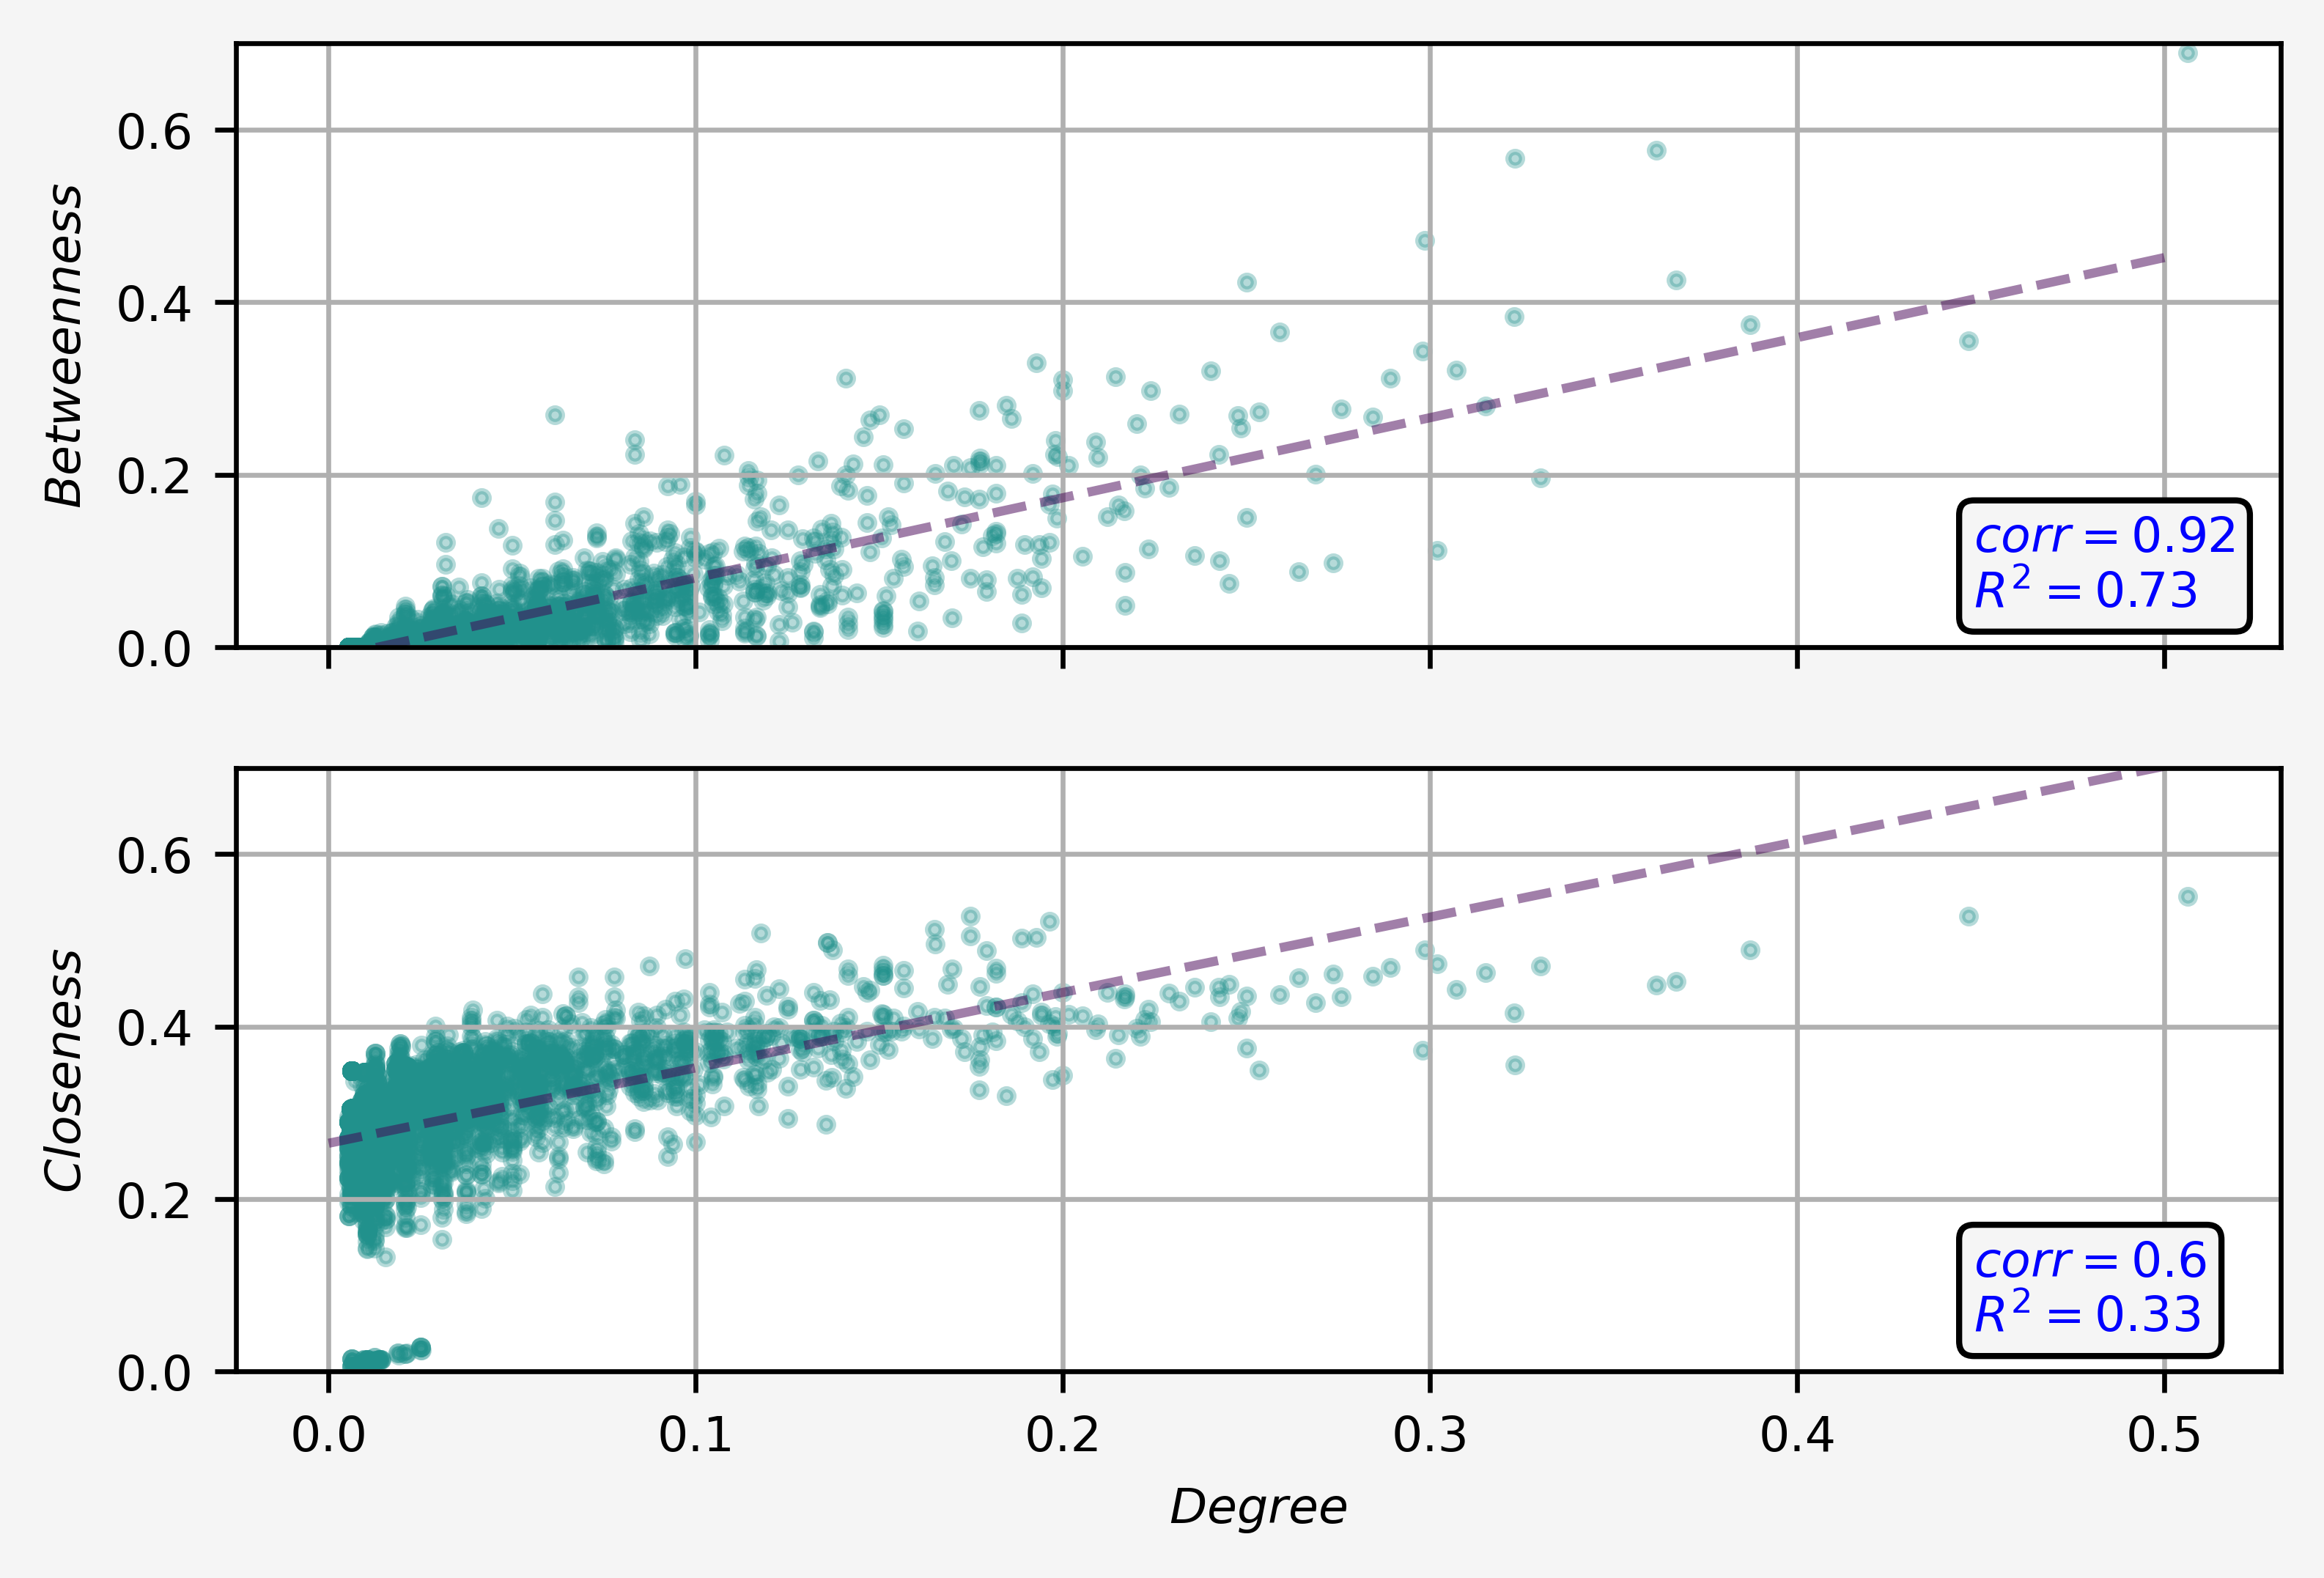

In [54]:
plt.rcParams.update({'font.size': 8})

fig, ax = plt.subplots(2,1, facecolor = 'whitesmoke', dpi = 600, sharex = 'col')
ax[0].scatter(Data['degree'],Data['betweenness'], s = 5, alpha = 0.33, color = plt.cm.viridis(0.5))
ax[1].scatter(Data['degree'],Data['closeness'], s = 5, alpha = 0.33, color = plt.cm.viridis(0.5))
ax[0].set_ylim([0,0.7])
ax[1].set_ylim([0,0.7])
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$Betweenness$')
ax[1].set_ylabel(r'$Closeness$')
ax[1].set_xlabel(r'$Degree$')
cls = LinearRegression().fit(Data['degree'].reshape(-1,1), Data['betweenness'].reshape(-1,1))
ax[0].plot([0,0.5], [cls.predict(np.array([0]).reshape(-1,1))[0,0], cls.predict(np.array([0.5]).reshape(-1,1))[0,0]], linestyle = 'dashed', c = plt.cm.viridis(0), alpha = 0.5)
r2 = round(cls.score(Data['degree'].reshape(-1,1), Data['betweenness'].reshape(-1,1)), 2)
ax[0].text(0.85,0.05, r'$corr = $' + str(round(cor['Betweenness'],2)) + '\n' + r'$R^2 = $' + str(round(r2,2)), 
                        transform=ax[0].transAxes, 
                        fontsize = 8, 
                        color = 'blue',
                        va='bottom', ha='left', 
                        bbox = dict(boxstyle='round', facecolor='whitesmoke', alpha=1.0)
                        )
cls = LinearRegression().fit(Data['degree'].reshape(-1,1), Data['closeness'].reshape(-1,1))
ax[1].plot([0,0.5], [cls.predict(np.array([0]).reshape(-1,1))[0,0], cls.predict(np.array([0.5]).reshape(-1,1))[0,0]], linestyle = 'dashed', c = plt.cm.viridis(0), alpha = 0.5)
r2 = round(cls.score(Data['degree'].reshape(-1,1), Data['closeness'].reshape(-1,1)),2)
ax[1].text(0.85,0.05, r'$corr = $' + str(round(cor['Closeness'],2)) + '\n' + r'$R^2 = $' + str(round(r2,2)), 
                        transform=ax[1].transAxes, 
                        fontsize = 8, 
                        color = 'blue',
                        va='bottom', ha='left', 
                        bbox = dict(boxstyle='round', facecolor='whitesmoke', alpha=1.0)
                        )

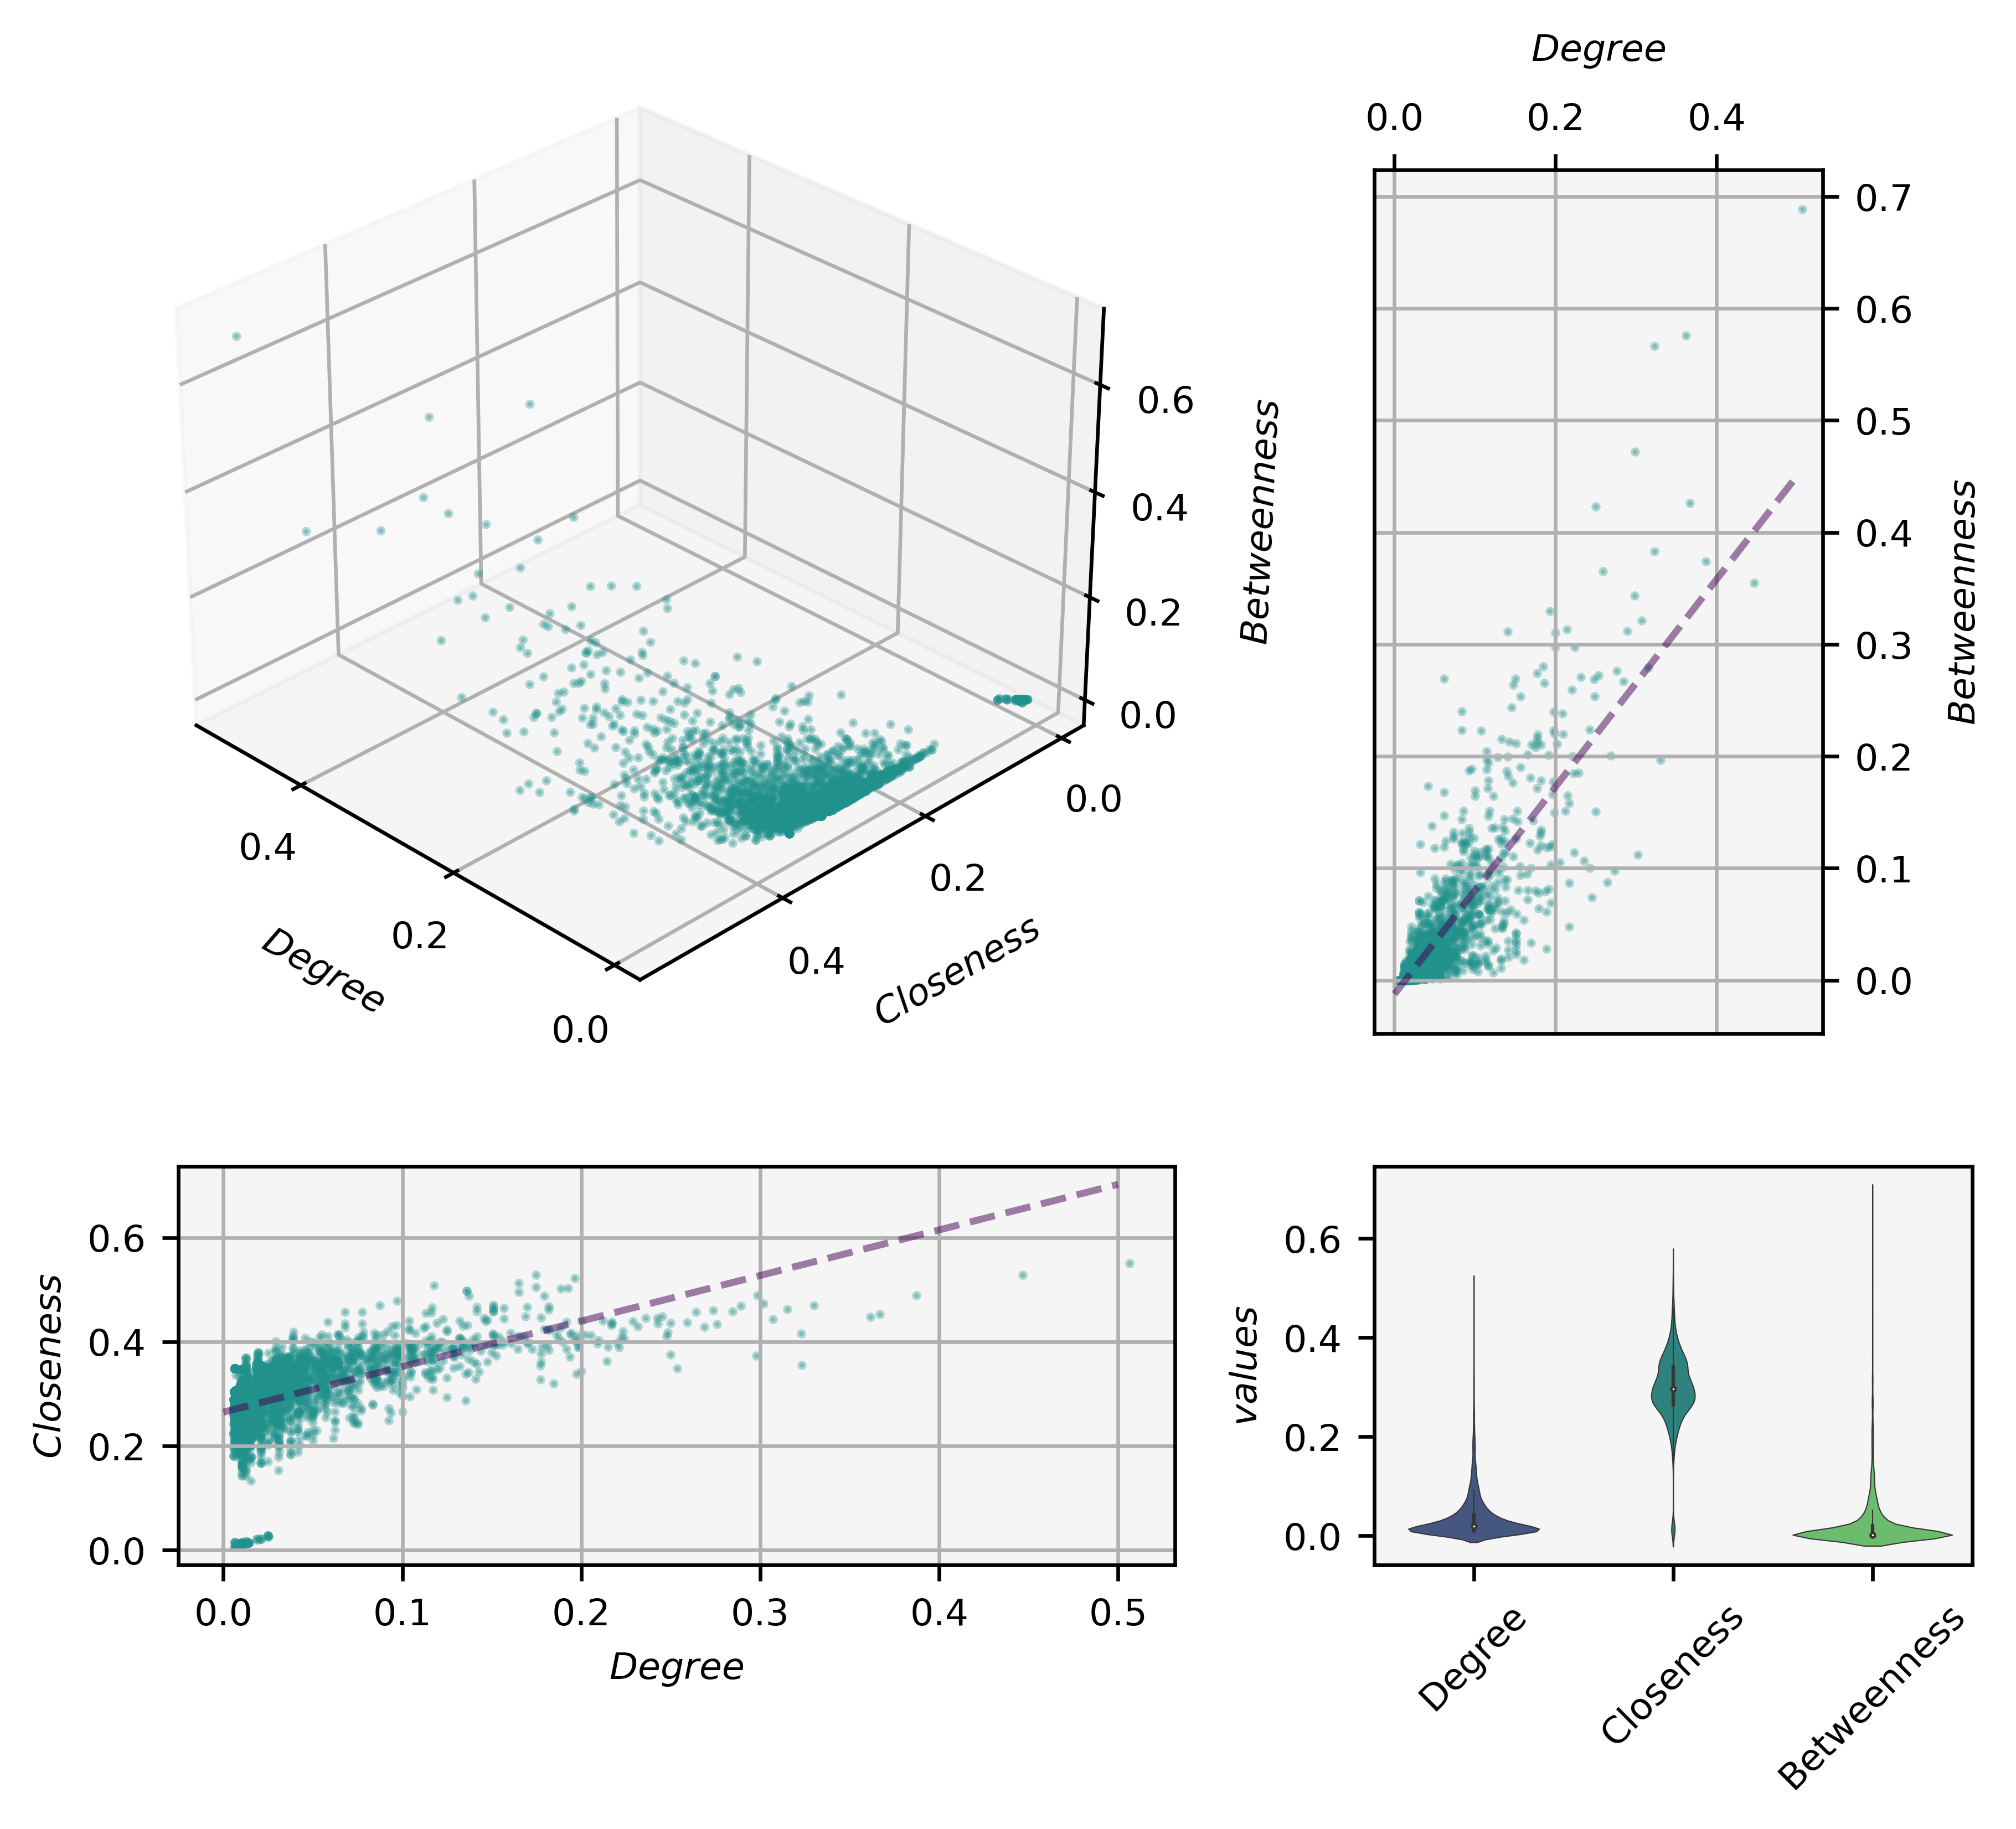

In [9]:
plt.rcParams.update({'font.size': 8})

fig = plt.figure(dpi = 600)
ax = plt.axes()  # standard axes
ax.axis('off')

ax1 = plt.axes([0.0, 0.5, 0.75, 0.75], projection ="3d")
xx, yy, zz = Data['degree'][indices], Data['closeness'][indices], Data['betweenness'][indices]
ax1.scatter3D(xx, yy, zz, marker = 'o', alpha = 0.33, s = 1, color = plt.cm.viridis(0.5))
ax1.set_xlabel(r'$Degree$')
ax1.set_ylabel(r'$Closeness$')
ax1.set_zlabel(r'$Betweenness$')
ax1.set_xticks(np.arange(0,1.0,0.2))
ax1.set_yticks(np.arange(0,1.0,0.2))
ax1.set_zticks(np.arange(0,1.0,0.2))
ax1.tick_params(axis='both', which='major', pad=0)
ax1.xaxis.labelpad=0
ax1.yaxis.labelpad=0
ax1.zaxis.labelpad=0
e, a = 30, 135
ax1.view_init(e, a)

ax2 = plt.axes([0.15, 0.1, 0.5, 0.30], facecolor = 'whitesmoke')
ax2.scatter(xx,yy, s = 1, alpha = 0.33, color = plt.cm.viridis(0.5))
cls = LinearRegression().fit(xx.reshape(-1,1), yy.reshape(-1,1))
ax2.plot([0,0.5], [cls.predict(np.array(0).reshape(-1,1)).flatten()[0], cls.predict(np.array(0.5).reshape(-1,1)).flatten()[0]], linestyle = 'dashed', c = plt.cm.viridis(0), alpha = 0.5)
ax2.grid()
ax2.set_xlabel(r'$Degree$')
ax2.set_ylabel(r'$Closeness$')

ax3 = plt.axes([0.75, 0.5, 0.225, 0.65], facecolor = 'whitesmoke')
ax3.scatter(xx,zz, s = 1, alpha = 0.33, color = plt.cm.viridis(0.5))
cls = LinearRegression().fit(xx.reshape(-1,1), zz.reshape(-1,1))
ax3.plot([0,0.5], [cls.predict(np.array(0).reshape(-1,1)).flatten()[0], cls.predict(np.array(0.5).reshape(-1,1)).flatten()[0]], linestyle = 'dashed', c = plt.cm.viridis(0), alpha = 0.5)
ax3.grid()
ax3.set_xlabel(r'$Degree$')
ax3.set_ylabel(r'$Betweenness$')
ax3.xaxis.labelpad = 15
ax3.yaxis.labelpad = 15
ax3.yaxis.tick_right()
ax3.yaxis.label_position = 'right'
ax3.xaxis.tick_top()
ax3.xaxis.label_position = 'top'

ax4 = plt.axes([0.75, 0.1, 0.30, 0.30], facecolor = 'whitesmoke')
df = pd.DataFrame()
df['Degree'] = Data['degree']
df['Closeness'] = Data['closeness']
df['Betweenness'] = Data['betweenness']
import seaborn as sns
sns.violinplot(data = df, ax = ax4, palette='viridis', linewidth = 0.25)
ax4.set_ylabel(r'$values$')
ax4.set_xticklabels(labels = ax4.get_xticklabels(), rotation = 45)
plt.show()

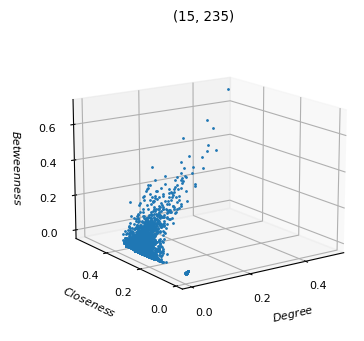

In [118]:
plt.rcParams.update({'font.size': 8})

fig = plt.figure(dpi = 100, facecolor=None)
ax = plt.axes(projection ="3d")
# degree
# closeness
# betweenness
xx, yy, zz = Data['degree'], Data['closeness'], Data['betweenness']
ax.scatter3D(xx, yy, zz, marker = 'o', depthshade=False, s = 1)

ax.set_xlabel(r'$Degree$')
ax.set_ylabel(r'$Closeness$')
ax.set_zlabel(r'$Betweenness$')

ax.set_xticks(np.arange(0,1.0,0.2))
ax.set_yticks(np.arange(0,1.0,0.2))
ax.set_zticks(np.arange(0,1.0,0.2))

# ax.set_facecolor('whitesmoke')
e, a = 15, 235
ax.set_title(f"({e}, {a})")
ax.view_init(e, a)
plt.show()

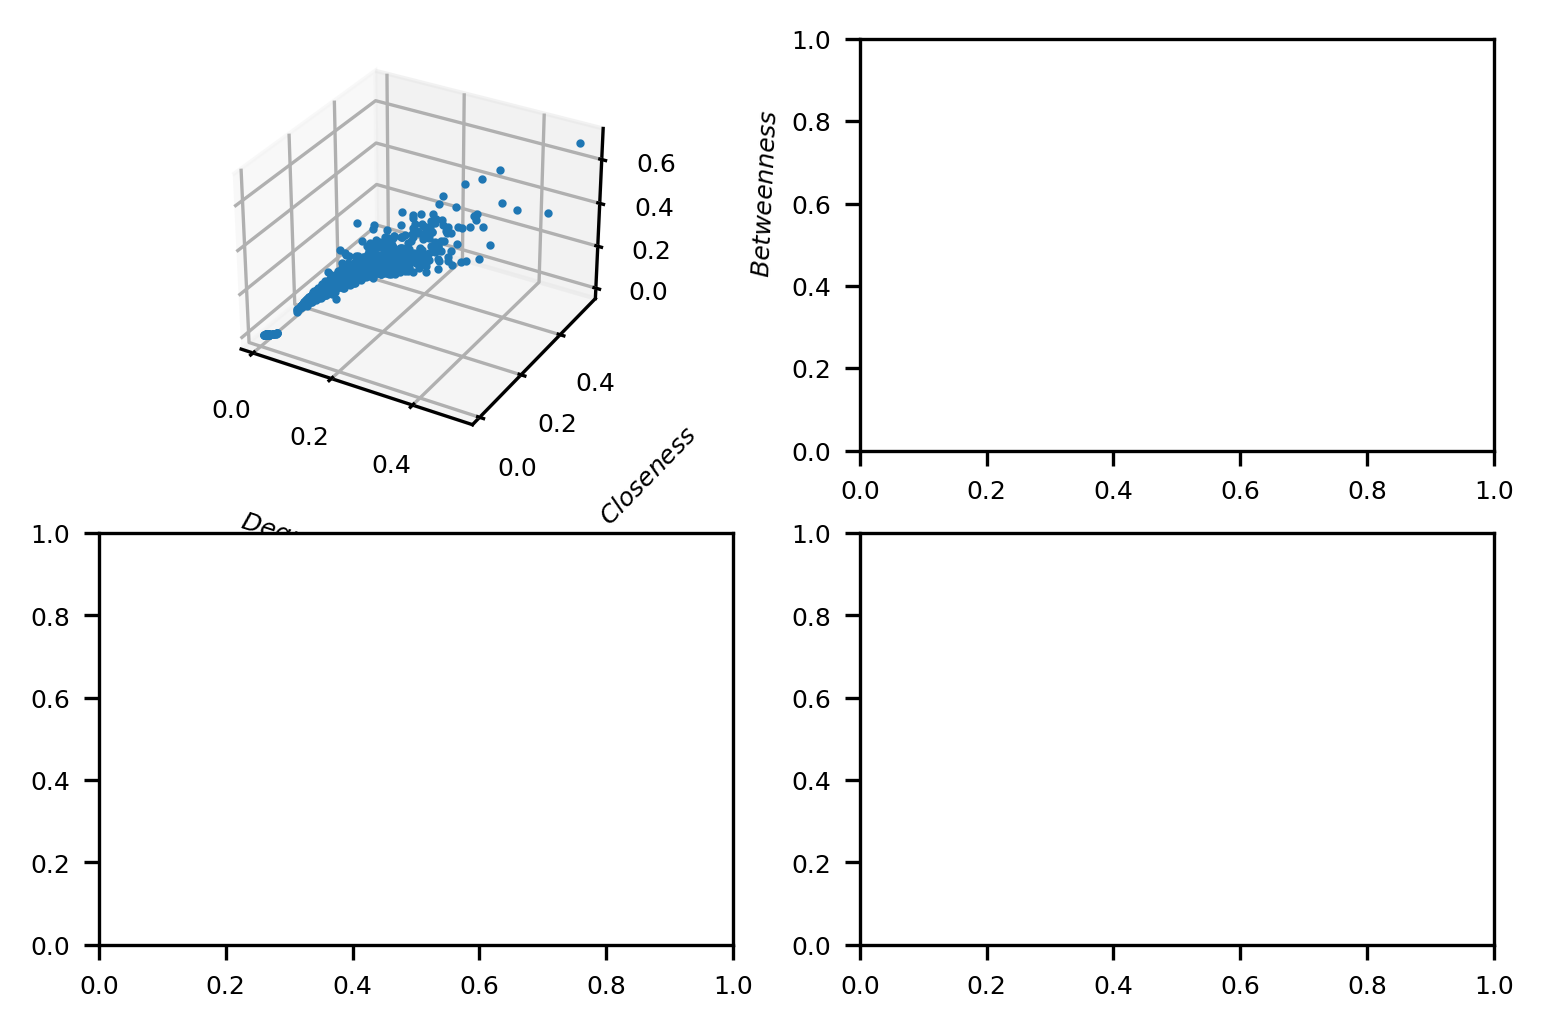

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams.update({'font.size': 6})
fig = plt.figure(dpi = 300, facecolor=None)
ax1 = fig.add_subplot(221, projection='3d')
xx, yy, zz = Data['degree'], Data['closeness'], Data['betweenness']
ax1.scatter3D(xx, yy, zz, marker = 'o', depthshade=False, s = 1)
ax1.set_xlabel(r'$Degree$', linespacing=0)
ax1.set_ylabel(r'$Closeness$')
ax1.set_zlabel(r'$Betweenness$')
ax1.set_xticks(np.arange(0,1.0,0.2))
ax1.set_yticks(np.arange(0,1.0,0.2))
ax1.set_zticks(np.arange(0,1.0,0.2))
ax1.tick_params(axis='both', which='major', pad=0)
# ax1.xaxis.labelpad=0
# ax1.yaxis.labelpad=0
# ax1.zaxis.labelpad=0
ax1.xaxis._axinfo['label']['space_factor'] = 0
# e, a = 15, 235
# ax1.set_title(f"({e}, {a})")
# ax1.view_init(e, a)


ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

